In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_axis = np.load("bin_mids.npy")
wL = np.load("pT200-300_WL_sig_hist.npy")
wT = np.load("pT200-300_WL_bkg_hist.npy")

# pT 200 - 300

In [2]:
x_axis

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99])

In [3]:
print('Sum of wL : '+str(np.sum(wL)))
print('Sum of wT : '+str(np.sum(wT)))

Sum of wL : 170414
Sum of wT : 170312


## Definitions

In [4]:
from scipy import optimize
from numpy import exp, loadtxt, pi, sqrt
from scipy.integrate import quad

def gaussian(x, amp1, cen1, wid1, amp2, cen2, wid2):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return ((amp1/(sqrt(2*pi) * wid1)) * exp(-(x-cen1)**2/(2*wid1**2))+ 
            (amp2/(sqrt(2*pi) * wid2)) * exp(-(x-cen2)**2/(2*wid2**2)))

def background(x, amp1, cen1, wid1, amp2, cen2, wid2, amp3, cen3, wid3):
    return  ((amp1/(sqrt(2*pi) * wid1)) * exp(-(x-cen1)**2 / (2*wid1**2)) + 
             (amp2/(sqrt(2*pi) * wid2)) * exp(-(x-cen2)**2 / (2*wid2**2)) + 
             (amp3/(sqrt(2*pi) * wid3)) * exp(-(x-cen3)**2 / (2*wid3**2)))

def sig_func(x):
    return gaussian(x, params_WL[0], params_WL[1], params_WL[2], params_WL[3], params_WL[4], params_WL[5])

def bkg_func(x):
    return background(x, params_WT[0], params_WT[1], 
                           params_WT[2], params_WT[3], params_WT[4],
                           params_WT[5], params_WT[6], params_WT[7],
                           params_WT[8])

def fittot(x, amp1, amp2):
    return (amp1*(sig_func(x))+
            amp2*(bkg_func(x)))

def num_sig(amp): # Longitudinal W
    ans = 0
    for i in range(len(x_axis)):
        ans = ans + sig_func(x_axis[i])
    return ans*amp
    
def num_bkg(amp): # Transverse W
    ans = 0
    for i in range(len(x_axis)):
        ans = ans + bkg_func(x_axis[i])
    return ans*amp
    
def L_T_ratio(numL,numT):
    rat = numL/(numT+numL)
    return rat

## Longitudinal (Signal)

In [5]:

init_vals = [3000, 0.5, 0.3, 10000, 0.6, 0.02]

params_WL, params_covariance_WL = optimize.curve_fit(gaussian, x_axis, wL,
                                               p0=init_vals)

#def test_func(x, x0, x1, a, b, c, d):
#    return a * math.exp(-b * (x-x0)**2)+ c * math.exp(-d * (x-x1)**2)

#params, params_covariance = optimize.curve_fit(test_func, x_axis, wL, 
#                                               p0=[0.5, 0.6, 4000, 0.2, 12000, 0.05])

print(params_WL)
print("Number estimated from fit : "+str(num_sig(1))+", difference : "+str(np.sum(wL)-num_sig(1)))

[-2.57655269e+03  4.82966237e-01 -1.32623962e-01  8.41390474e+02
  6.40904441e-01  2.55265707e-02]
Number estimated from fit : 170873.7988524759, difference : -459.798852475913


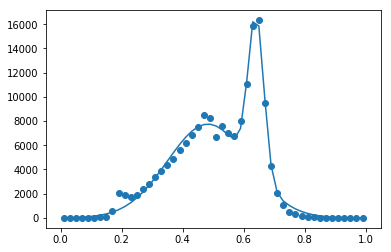

In [6]:
plt.scatter(x_axis, wL,label='data')
plt.plot(x_axis, gaussian(x_axis, params_WL[0], params_WL[1], 
                          params_WL[2], params_WL[3], params_WL[4], params_WL[5]),
         label='Fitted function')
plt.show()

## Transverse (Background) 

In [8]:
init_vals = [2000, 0.2, 0.01, 3000, 0.4, 0.02, 5000, 0.6, 0.02]
#init_vals = [3000, 0.2, 0.01, 4000, 0.6, 0.02, 4000, 0.6, 0.02, 4000, 0.6, 0.02]
#init_vals = [ 9000, 0.6, 0.02]

params_WT, params_covariance_WT = optimize.curve_fit(background, x_axis, wT,
                                               p0=init_vals)


print(params_WT)
print("Number estimated from fit : "+str(num_bkg(1))+", difference : "+str(np.sum(wT)-num_bkg(1)))

[2.72903961e+02 1.96135674e-01 1.56402495e-02 2.81986514e+03
 4.02111605e-01 1.42278405e-01 3.96061430e+02 6.35438659e-01
 2.52788142e-02]
Number estimated from fit : 174110.00823157848, difference : -3798.008231578482


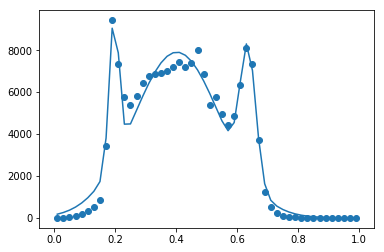

In [9]:
plt.scatter(x_axis, wT)

plt.plot(x_axis, background(x_axis, params_WT[0], params_WT[1], 
                           params_WT[2], params_WT[3], params_WT[4],
                           params_WT[5], params_WT[6], params_WT[7],
                           params_WT[8]),
         label='Fitted function')
plt.show()

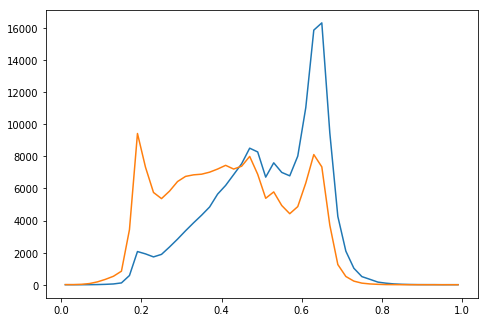

In [10]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
# Plot and show our data
ax.plot(x_axis, wL)
ax.plot(x_axis, wT)
plt.show()

# WZ Testing

In [9]:
wz = np.load("pT200-300_WZ_hist.npy")


In [10]:
init_vals = [0.06, 0.11]

params_WZ, params_covariance_WZ = optimize.curve_fit(fittot, x_axis, wz,
                                               p0=init_vals)
print(params_WZ)

[0.03037433 0.08767823]


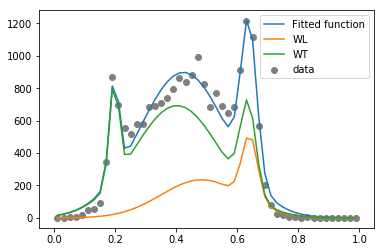

In [11]:
plt.scatter(x_axis, wz,label='data',color='grey')
plt.plot(x_axis, fittot(x_axis, params_WZ[0], params_WZ[1]),
         label='Fitted function')
plt.plot(x_axis, params_WZ[0]*sig_func(x_axis),
         label='WL')
plt.plot(x_axis, params_WZ[1]*bkg_func(x_axis),
         label='WT')
plt.legend()
plt.show()

In [12]:
longi_val = num_sig(params_WZ[0])
trans_val = num_bkg(params_WZ[1])
ltrat = L_T_ratio(longi_val,trans_val)

print(longi_val) #Something wrong too low values
print(trans_val)
print(ltrat)

5190.176960612191
15265.656635108106
0.25372600614516455
